<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/spring2021/blob/master/adaline.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>


# Adaline

This builds on the original and the Perceptron lab by solving the 1-D problem with an objective function.

### References

* [Python Machine Learning, 3rd Edition](https://github.com/rasbt/python-machine-learning-book-3rd-edition) (2019) by Rashka & Mirjalili -- github
    * [ch02.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch02/ch02.ipynb) -- github

In [ ]:
# AdalineGD (uses gradient descent)
import numpy as np

class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Cost function
Sum of squared errors (SSE):
$$
J(w) = \frac{1}{2} \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right)^2
$$
where
$$
z = w_0 + \sum_{i=1}^p w_i x_i = \mathbf{w}^T \mathbf{x}
$$
For Adaline, $\phi (z) = z$, so $J(w)$ is a quadratic function of $w$ (upward facing parabola) in one dimension.

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch02/images/02_12.png" width="600"/>


In two dimensions, the cost function is an upward facing bowl with a global minimum. For any combination of $w$, the direction of maximum increase in $J(w)$ occurs in the direction of the gradient $\nabla J$.
$$
J(w+\Delta w) = J(w) + \nabla J \cdot dw
$$
The components of $\nabla J$ are $\frac{J}{dw_j}$, and $dw$ is parallel to $\nabla J$.


Likewise, the most rapid decrease in $J$ occurs in the direction of $ - \nabla J$. So if we want to find the $w$ that minimizes $J$, then we make updates to $w$ in the direction of $-\nabla J$, that is, down the gradient, hence the term gradient descent.
If there are $n$ features, then there are $n+1$ weights $w_j$ and component $j$ of $\nabla J$ is:

$$
\frac{dJ}{dw_j} = \frac{dJ}{dz} \frac{dz}{dw_j} = 
- \sum_i \left( y^{(i)} - \phi(z^{(i)}) \right) x_j^{(i)}
$$

Although we don't know the minimum value of $J$, we can compute $J(w)$ and $\nabla J$ as a function of $w$. And when $J$ is convex (as is the case for Adaline), we know that $\nabla J$ decreases to zero at the minimum (i.e., the bottom of the bowl is flat). Therefore, we may want to increase the learning rate $\eta$ as we get closer to the minimum.



In [ ]:
# Load the Iris data directly from the UC Irvine archive
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


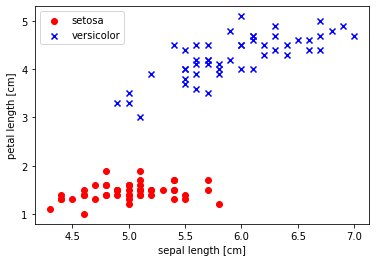

In [ ]:
# Plot a subset of the data (2 features for 2 classes)
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left');

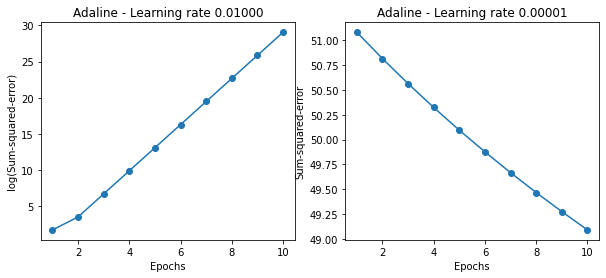

In [ ]:
# Train the model
eta1 = .01
ada1 = AdalineGD(n_iter=10, eta=eta1).fit(X, y)

# Plot the learning curves
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate {:.5f}'.format(eta1))

eta2 = .00001
ada2 = AdalineGD(n_iter=10, eta=eta2).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate {:.5f}'.format(eta2))
plt.show()

With a convex cost function, increasing $J$ is a sign that the learning rate is too large (right-hand figure below), so you should choose smaller $\eta$.

Conversely, linearly decreasing learning rate is a sign that you may be able to increase the learning rate, or that you're still fairly far away from the minimum $J$.

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch02/images/02_12.png" width="600"/>


In [ ]:
# Convenience function for plotting the decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

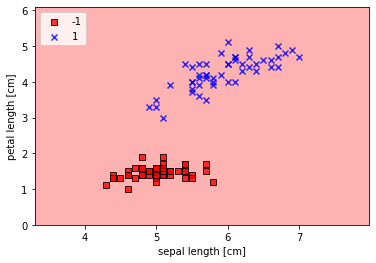

In [ ]:
# Plot the decision region
plot_decision_regions(X, y, classifier=ada2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left');

# Feature scaling

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch02/images/02_13.png" width="600"/>

In [ ]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# Assignment

Adaline in 1-D: Classify setosa and versicolor using only petal length.

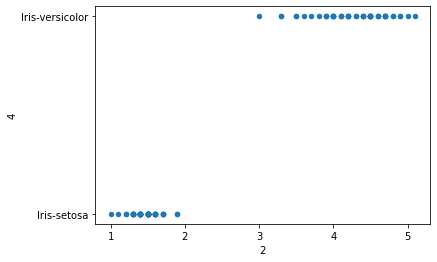

In [ ]:
# Remove virginica
df = df[df.iloc[:,4] != 'Iris-virginica']

# Plot the remaining 2 classes vs petal length (using Pandas)
df.plot.scatter(x=2, y=4); # column 2 is petal length

In [ ]:
# You can confirm that column 2 is petal length with sklearn metadata
from sklearn import datasets
iris = datasets.load_iris()
print(iris.feature_names)
print(iris.data[0,:])
df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[5.1 3.5 1.4 0.2]


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Extract petal length
X = df.iloc[0:100, [2]].values

# Create class labels {-1,1} as expected by AdalineGD
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

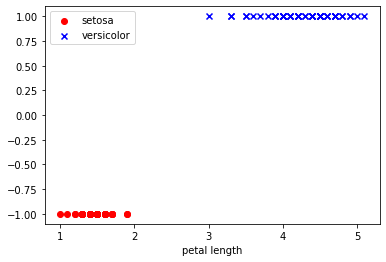

In [ ]:
# plot data
plt.scatter(X[:50, 0], y[:50], 
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], y[50:100], 
            color='blue', marker='x', label='versicolor')
plt.xlabel("petal length")
plt.legend();

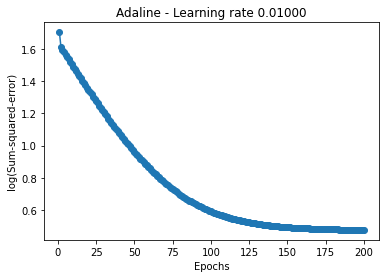

In [ ]:
# Train the model
eta = .001
ada = AdalineGD(n_iter=200, eta=eta).fit(X, y)

# Plot the cost function vs epoch
plt.plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate {:.5f}'.format(eta1));

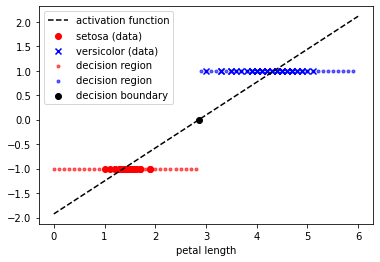

In [ ]:
# plot data
colors=['red', 'blue']
plt.scatter(X[:50, 0], y[:50], 
            color=colors[0], marker='o', label='setosa (data)')
plt.scatter(X[50:100, 0], y[50:100], 
            color=colors[1], marker='x', label='versicolor (data)')

# Plot the decision region (linear sequence of points for the 1-D problem)
x_pred = np.arange(0, 6, .1)
x_pred = x_pred[..., np.newaxis]
y_pred = ada.predict(x_pred)
for k in np.unique(y_pred):
  mask = y_pred == k
  c = colors[k]
  if k == -1: c = colors[0]
  plt.scatter(np.squeeze(x_pred[mask]), y_pred[mask], 
              marker='.', c=c, alpha=.6, label='decision region')

# Plot the activation function, which is a line for the 1-D Adaline
x_pred = np.array([[0], [6]])
y_activation = ada.w_[0] + ada.w_[1] * x_pred
plt.plot(x_pred, y_activation, c='k', linestyle='dashed', label='activation function')

# Plot the decision boundary (z=0)
x0 = - ada.w_[0] / ada.w_[1]
plt.scatter([x0], [0], c='k', marker='o', label='decision boundary')

plt.xlabel('petal length')
plt.legend();

# Discussion

Recall: For the Perceptron, the slope of the line isn't relevant. Updates are based on classification mistakes. With no mistakes, there are no updates. Multiple solutions were possible for separable classes (i.e., the algorithm doesn't have a unique solution). And the algorithm doesn't converge if the classes are not separable.

In contrast: For Adaline, the slope of the line (activation function $\phi(z)$) is important. The activation function $\phi(z)$ enters into the objective function $J(w)$ that we mimimize to solve the problem. This is linear regression (least squares). The solution is unique and the algorithm will converge to the unique solution (mimimum $J(w)$), provided the training rate $\eta$ is sufficiently small.

# Conclusion

Adaline is an improvement on the Perceptron. But the activation function $\phi(z)$ doesn't do a very good job at modeling the data when we're doing classification. What now? Answer: logistic regression.

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch02/images/02_09.png" width=600 />
